# Домашнее задание №10. Классификация
Во всех заданиях можно использовать существующие модели, например, из библиотеки <code>sklearn</code>, либо реализовать модель самостоятельно.

## Задание 1
В этом задании понадобится подготовленный в домашнем задании №5 датасет Titanic.

Воспользуйтесь одной из рассмотренных на последних двух лекциях и семинарах моделью для предсказания того, выжил ли пассажир.

Выведите точность на тестовой выборке.

In [ ]:
# Подготовка датасета
import pandas as pd
from sklearn.model_selection import train_test_split


for_train = pd.read_csv("train.csv")

y = for_train['Survived']
features = ['Pclass', 'Sex', 'SibSp', 'Parch']
X = pd.get_dummies(for_train[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# Напишите свой код в данной ячейке
import sklearn
from sklearn.metrics import accuracy_score, precision_score, log_loss
from sklearn.svm import LinearSVC
import numpy as np
import matplotlib as plt
from sklearn.linear_model import LogisticRegression


model = LinearSVC(dual = 'auto')
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность LinearSVC-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')
precision = precision_score(y_test, y_pred)
print(f'Точность LinearSVC-модели на тестовой выборке (precision_score): {accuracy:.2f}')

model = LogisticRegression(solver = 'liblinear')
model.fit(X, y)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность LogisticRegression-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')
precision = precision_score(y_test, y_pred)
print(f'Точность LogisticRegression-модели на тестовой выборке (precision_score): {accuracy:.2f}')

y_proba = model.predict_proba(X_test)
logloss = log_loss(y_test, y_proba)
print(f'Log Loss: {logloss}')

Точность LinearSVC-модели на тестовой выборке (accuracy_score): 0.79
Точность LinearSVC-модели на тестовой выборке (precision_score): 0.79
Точность LogisticRegression-модели на тестовой выборке (accuracy_score): 0.79
Точность LogisticRegression-модели на тестовой выборке (precision_score): 0.79
Log Loss: 0.4489581630900501


## Задание 2
Для результатов предыдущего задания постройте ROC кривую, а также выведите значение ROC-AUC.

0.8505791505791506


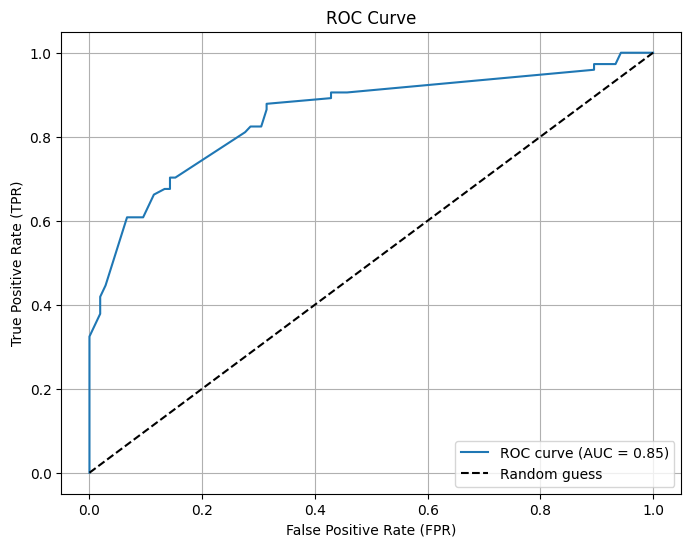

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pylab as plt


fpr, tpr, thresholds = roc_curve(y_test, y_proba[:, 1])
roc_auc = roc_auc_score(y_test, y_proba[:, 1])

print(roc_auc)
plt.figure(figsize = (8, 6))
plt.plot(fpr, tpr, label = f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'k--', label = 'Random guess')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('ROC Curve')
plt.legend(loc = 'lower right')
plt.grid()
plt.show()

## Задание 3

В следующих двух заданиях нужно будет работать с датасетом Iris. Загрузить его можно так:

In [ ]:
from sklearn import datasets
iris = datasets.load_iris()
iris = pd.DataFrame(np.concatenate((iris.data, np.array([iris.target]).T), axis = 1), columns = iris.feature_names + ['target'])
print(iris.head(101))

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
96                 5.7               2.9                4.2               1.3   
97                 6.2               2.9                4.3               1.3   
98                 5.1               2.5                3.0               1.1   
99                 5.7               2.8                4.1               1.3   
100                6.3               3.3                6.0               2.5   

     target  
0       0.0  

Описание датасета можно найти, например, [здесь](https://scikit-learn.ru/stable/datasets/toy_dataset.html#iris-dataset).

Выберите какие-нибудь два признака и обучите модель классификации для предсказания класса цветка.

Выведите точность на тестовой выборке. Постройте график, выделив цветами классифицированные области, например, при помощи <code>sklearn.inspection.DecisionBoundaryDisplay</code>.

Точность SVC-модели на тестовой выборке (accuracy_score): 0.90


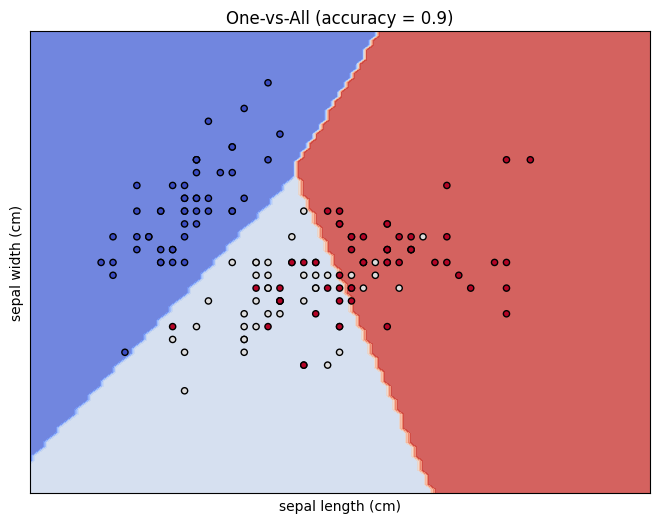

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score

y = iris['target']
features = ['sepal length (cm)', 'sepal width (cm)']
X = pd.get_dummies(iris[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = "linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность SVC-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')

fig, ax = plt.subplots(figsize=(8, 6))
X0, X1 = X.iloc[:, 0], X.iloc[:, 1]
disp = DecisionBoundaryDisplay.from_estimator(model,
                                              X_test,
                                              cmap=plt.cm.coolwarm,
                                              alpha=0.8,
                                              ax=ax)
ax.scatter(X0, X1, c=y, cmap=plt.cm.coolwarm, s=20, edgecolors="k")
ax.set_xticks(())
ax.set_yticks(())
ax.set_title("One-vs-All" + f" (accuracy = {accuracy_score(y_test, model.predict(X_test))})")
plt.show()

## Задание 4

Используйте теперь все признаки для обучения той же модели. Выведите точность на тестовой выборке.

In [ ]:
# Напишите свой код в данной ячейке
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC, LinearSVC
from sklearn.inspection import DecisionBoundaryDisplay
from sklearn.metrics import accuracy_score


y = iris['target']
features = ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
X = pd.get_dummies(iris[features])
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = SVC(kernel = "linear")
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f'Точность SVC-модели на тестовой выборке (accuracy_score): {accuracy:.2f}')

Точность SVC-модели на тестовой выборке (accuracy_score): 1.00
